# Diplomado Inteligencia artificial y aprendizaje profundo
## Daniel Alejandro Osuna Garzón 

# Librerías

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
#Keras/ Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Lectura de los datos

In [2]:
df = pd.read_csv (r'data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


A continuación vamos a definir las variables explicativas y la variable respuesta

In [3]:
x = df.iloc[:,2:32]
y = df.iloc[:,1]

In [4]:
# codifica la variable y como unos y ceros
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

Partición de los datos, tomando el 10% de la base original

In [5]:
#Particion de la data (training y test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [6]:
x_test.shape

(57, 30)

# Normalización de los datos

In [7]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Construcción de la red neuronal se realiza con una primera que contiene 30 neuronas de entrada ($X_1$,$X_2$,$\cdots$,$X_{30}$) seguido de una segunda capa (oculta) con 5 neuronas ($C_1$,$C_2$,$\cdots$,$C_5$) y finalizando con una tercera capa con una unica neurona.

In [8]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=5, activation='relu', input_shape=(30,)))
# Adding dropout to prevent overfitting (regularización)
#classifier.add(Dropout(0.1)) # 10% out in each epoc
#classifier.add(Dense(units=5, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo

In [9]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 155       
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


Para el ajuste del modelo  se utilizarán 50 iteraciones  poniendo a prueba el modelo en cada iteracion con set de validación.

In [11]:
history = classifier.fit(x_train, y_train, batch_size=29, epochs=50,validation_split = 0.2)

Epoch 1/50
15/15 [==============================] - 1s 37ms/step - loss: 1.0238 - accuracy: 0.3547 - val_loss: 0.8697 - val_accuracy: 0.4757
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8869 - accuracy: 0.4485 - val_loss: 0.7789 - val_accuracy: 0.5340
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8390 - accuracy: 0.4910 - val_loss: 0.7054 - val_accuracy: 0.6019
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.6107 - val_loss: 0.6444 - val_accuracy: 0.7184
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6821 - val_loss: 0.5946 - val_accuracy: 0.7767
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.7331 - val_loss: 0.5524 - val_accuracy: 0.7864
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7174 - val_loss: 0.5120 - val_accuracy: 0.8155
Epoch 8/50
15/15 [=

El anterior modelo nos da un accuracy del 97.1% para el set de training.

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  1],
       [ 0, 22]])

In [17]:
print("Nuestro accuracy es {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Nuestro accuracy es 98.24561403508771%


<AxesSubplot:>

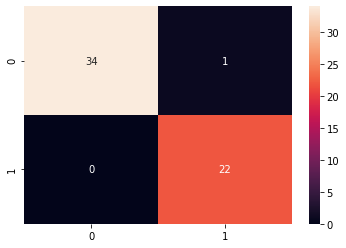

In [16]:
sns.heatmap(cm,annot=True)

In [18]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

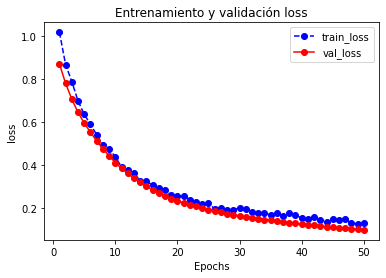

In [19]:
plot_metric(history, 'loss')

En el anterior gráfico observamos que no estamos teniendo problemas de sobre ajuste lo cual nos indicaría que la
selección de parámetros fue adecuada.

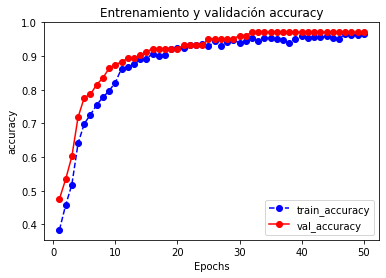

In [22]:
plot_metric(history, 'accuracy')

Para finalizar se observa que al poner a prueba el modelo con nuestro set de validación, el
acurracy sigue siendo muy bueno.

# Conclusiones 

Para este ejemplo no fue necesario utilizar una gran cantidad de parámetros para lograr un buen acurracy,
ademas tampoco fue necesario utilizar una gran cantidad de iteraciones pues el modelo converge rapidamente. 